In [1]:
import matplotlib.pyplot as plt

def plot_results(result, title='Measurement Results', figsize=(10, 6), label_rotation=45):
    """
    Visualize measurement results as a histogram
    """
    counts = result.get_counts()
    
    plt.figure(figsize=figsize)
    states = list(counts.keys())
    values = list(counts.values())
    
    plt.bar(range(len(states)), values, tick_label=states)
    plt.title(title)
    plt.xlabel('Quantum State')
    plt.ylabel('Count')
    plt.xticks(rotation=label_rotation, ha='right')
    plt.tight_layout()
    plt.show()


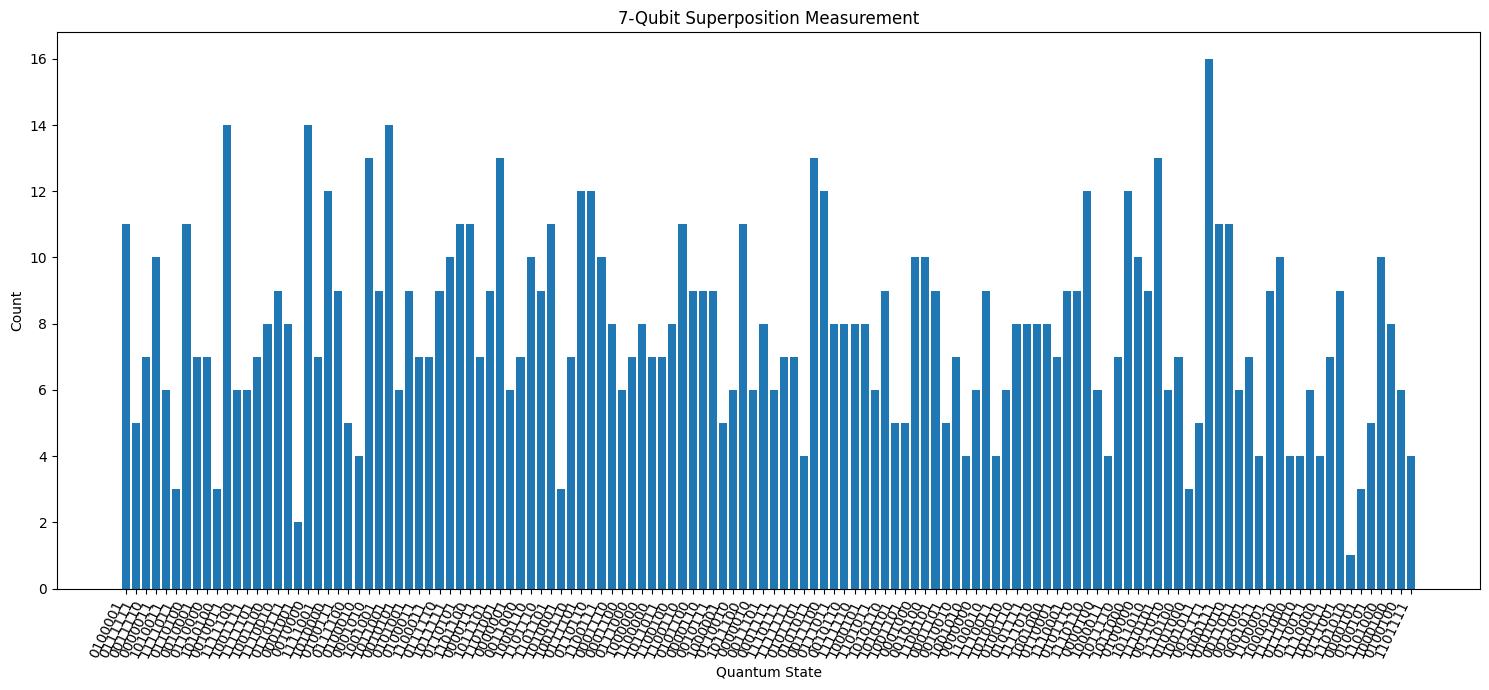

In [ ]:
from qsim import QuantumCircuit
from collections import Counter

class QuantumResult:
    def __init__(self, counts):
        self.counts = counts
    
    def get_counts(self):
        return self.counts

def execute(circuit, shots=1024):
    results = circuit.measure_all(shots)
    return QuantumResult(Counter([f"{b:0{circuit.num_qubits()}b}" for b in results]))

class Aer:
    @staticmethod
    def get_backend(name):
        return execute

# Usage example
if __name__ == "__main__":
    # Create circuit
    num_qubits = 7
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qc.h(i)
 
    # Simulate
    result = Aer.get_backend('qsim_simulator')(qc, shots=1000)
    
    # Visualize
    plot_results(
        result,
        title='7-Qubit Superposition Measurement',
        figsize=(30, 14),
        label_rotation=65
    )

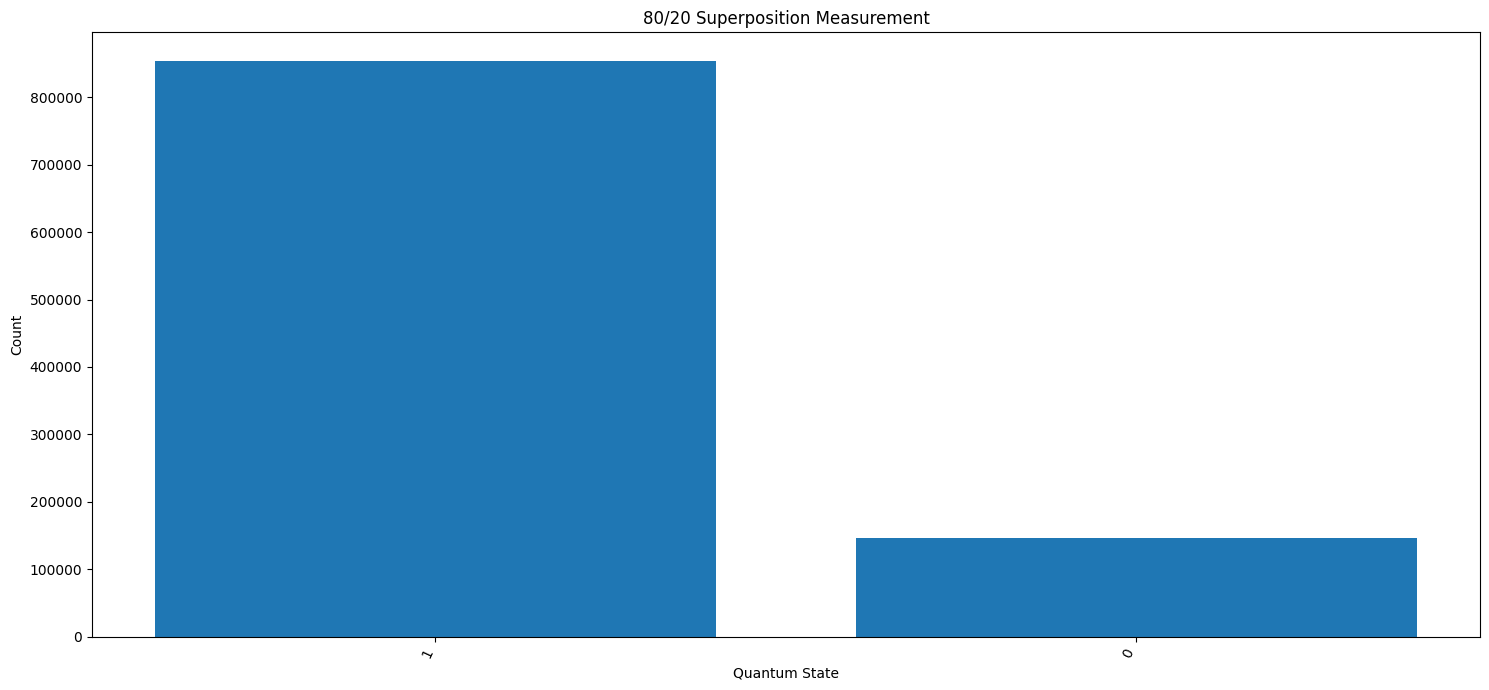

In [3]:
qc = QuantumCircuit(1)

# Apply a Ry rotation by ~0.927 radians to get ~80/20 probability distribution
# Since we don't have Ry, approximate using:
# Ry(theta) = H * Rz(theta) * H
# Rz(theta) can be implemented with S, T, and Z gates since they are Z rotations

# Let's approximate Rz(0.927) with T gates:
# T = Rz(pi/4) = 0.7854 rad, close to 0.927 rad
# We'll apply T once and then a small correction with S or Z to get closer

qc.h(0)  # H
qc.t(0)  # T = Rz(pi/4)
qc.s(0)  # S = Rz(pi/2)


qc.s(0)
qc.h(0)  

# Simulate
result = Aer.get_backend('qsim_simulator')(qc, shots=1000000)

# Visualize
plot_results(
    result,
    title='80/20 Superposition Measurement',
    figsize=(15, 7),
    label_rotation=65
)


